In [1]:
import os
import io
import math

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Ellipse

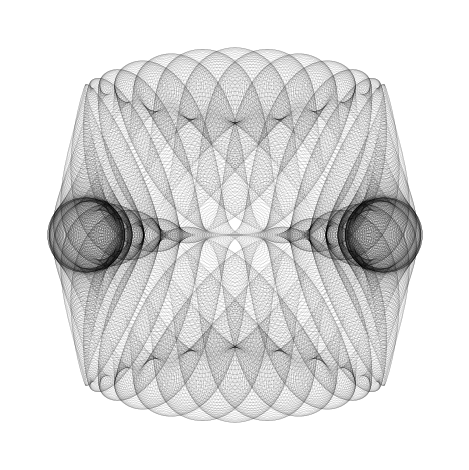

In [2]:
k = np.arange(1, 8001, 2)
a = np.cos(26 * np.pi * k / 8000) ** 3
b = np.sin(14 * np.pi * k / 8000)
r = (1/4) * (np.cos(40 * np.pi * k / 8000)) ** 2

circles = [Circle((x, y), radius, color='black', fill=False, linewidth=0.05)
           for x, y, radius in zip(b, a, r)]
collection = PatchCollection(circles, match_original=True)

fig, ax = plt.subplots(facecolor="w")
ax.add_collection(collection)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')
plt.savefig('circle_image.png', bbox_inches='tight', pad_inches=0)

buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
buf.seek(0)

plt.tight_layout()
plt.show()

In [3]:
img = Image.open(buf)
print(img.size)

(369, 369)


Attempting to load model from outputs\20250426_204709_EnWogE\checkpoint.pkl...


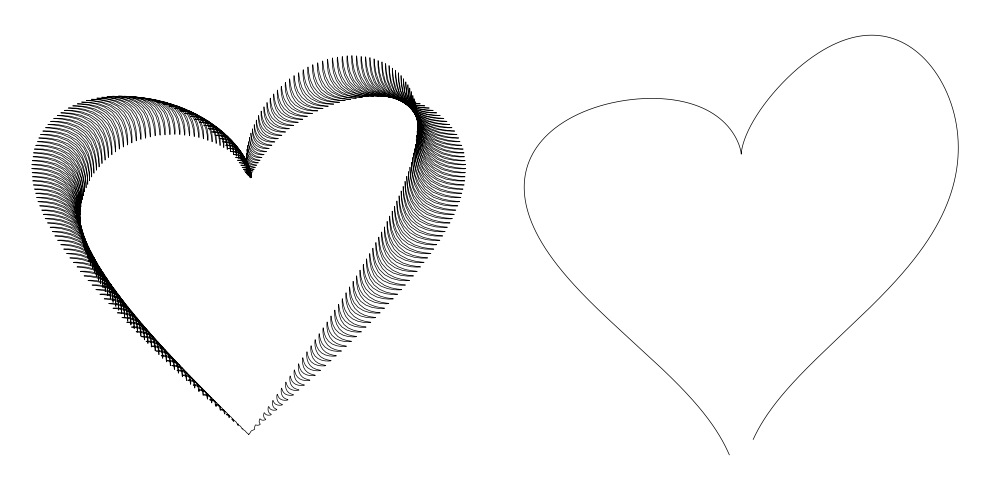

In [16]:
import pysr

t = np.linspace(0, np.pi, 5000).reshape(-1, 1)  # (5000, 1) shape

X = (4/9) * np.sin(2*t[:,0]) + (1/3) * (np.sin(t[:,0]))**8 * np.cos(3*t[:,0]) + (1/8) * np.sin(2*t[:,0]) * (np.cos(247*t[:,0]))**4
Y = np.sin(t[:,0]) + (1/3) * (np.sin(t[:,0]))**8 * np.sin(3*t[:,0]) + (1/8) * np.sin(2*t[:,0]) * (np.sin(247*t[:,0]))**4

model = pysr.PySRRegressor.from_file(run_directory="outputs/20250426_204709_EnWogE")
model.predict(t)

predicted = model.predict(t)

X_pred = predicted[:, 0]
Y_pred = predicted[:, 1]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# --- First plot
axs[0].plot(X, Y, color='black', linewidth=0.5)
axs[0].axis('equal')
axs[0].axis('off')

# --- Second plot (could be a different X2, Y2 if you want)
axs[1].plot(X_pred, Y_pred, color='black', linewidth=0.5)
axs[1].axis('equal')
axs[1].axis('off')

plt.tight_layout()
plt.savefig('data/easy_8.png')
plt.show()